In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

['00:00:00', '00:15:00', '00:30:00', '00:45:00', '01:00:00', '01:15:00', '01:30:00', '01:45:00', '02:00:00', '02:15:00', '02:30:00', '02:45:00', '03:00:00', '03:15:00', '03:30:00', '03:45:00', '04:00:00', '04:15:00', '04:30:00', '04:45:00', '05:00:00', '05:15:00', '05:30:00', '05:45:00', '06:00:00', '06:15:00', '06:30:00', '06:45:00', '07:00:00', '07:15:00', '07:30:00', '07:45:00', '08:00:00', '08:15:00', '08:30:00', '08:45:00', '09:00:00', '09:15:00', '09:30:00', '09:45:00', '10:00:00', '10:15:00', '10:30:00', '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00', '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00', '13:15:00', '13:30:00', '13:45:00', '14:00:00', '14:15:00', '14:30:00', '14:45:00', '15:00:00', '15:15:00', '15:30:00', '15:45:00', '16:00:00', '16:15:00', '16:30:00', '16:45:00', '17:00:00', '17:15:00', '17:30:00', '17:45:00', '18:00:00', '18:15:00', '18:30:00', '18:45:00', '19:00:00', '19:15:00', '19:30:00', '19:45:00', '20:00:00', '20:15:00', '20:30:00', '20

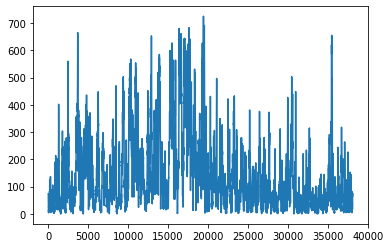

In [73]:
data= pd.read_csv('50Hertz.csv')
#print(data.head())
# Spearating Datas for future processing
dates=pd.to_datetime(data['Date'])
datacols=list(data)[1:97]
print(datacols)
df=data[datacols]
dfnp=np.array(df)
dfnp=dfnp.reshape(-1,1)  # changing to single column data
print(dfnp.shape)
plt.plot(dfnp)
plt.show()

In [74]:
# scaling the data using MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfnp_tr= scaler.fit_transform(dfnp)
#print(dfnp_tr[0:10])
# splitting the data into training and test in 70:30 split
training_size=int(len(dfnp)*0.7)
test_size=len(dfnp) - training_size
train_data,test_data=dfnp_tr[0:training_size,:],dfnp_tr[training_size:len(dfnp),:]
print(len(train_data))
print(len(test_data))

26678
11434


G:\ANACONDA_INSTALLATION\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [75]:
# subroutine for creaitng X(independent) and y(depdendent) data
def create_data(dataset, timestep):
    datax, datay = [], []
    for i in range(len(dataset) - timestep - 1):
        a = dataset[i:(i + timestep), 0]

        datax.append(a)
        datay.append(dataset[i + timestep, 0])
    return np.array(datax), np.array(datay)


In [76]:
time_step=96
x_train,y_train=create_data(train_data,time_step)
x_test,y_test =create_data(test_data,time_step)
print(len(x_test))

11337


In [77]:
#converting the 2 D data into 3D by adding a 3 rd dimension to suit the
# tensor flow model
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(11337, 96, 1)

In [78]:
# creating a LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(96,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64,verbose=1)


Epoch 1/5
416/416 [==============================] - 61s 139ms/step - loss: 0.0020 - val_loss: 2.9764e-04
Epoch 2/5
416/416 [==============================] - 56s 135ms/step - loss: 3.1950e-04 - val_loss: 1.2370e-04
Epoch 3/5
416/416 [==============================] - 57s 137ms/step - loss: 1.8924e-04 - val_loss: 9.4466e-05
Epoch 4/5
416/416 [==============================] - 57s 136ms/step - loss: 1.4818e-04 - val_loss: 7.2320e-05
Epoch 5/5
416/416 [==============================] - 58s 140ms/step - loss: 1.2655e-04 - val_loss: 5.9622e-05


In [79]:
#LSTM is now trained and we will predict the train and test data
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

#transforming back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [80]:
train_predict

array([[41.938736],
       [37.818012],
       [36.064636],
       ...,
       [26.8763  ],
       [24.662212],
       [21.614279]], dtype=float32)

In [81]:
y_train=y_train.reshape(-1,1)
y_train_orig=scaler.inverse_transform(y_train)
y_train_orig

array([[37.],
       [38.],
       [35.],
       ...,
       [20.],
       [18.],
       [17.]])

In [82]:
y_test=y_test.reshape(-1,1)
y_test_orig=scaler.inverse_transform(y_test)
y_test_orig

array([[ 92.],
       [ 99.],
       [108.],
       ...,
       [ 72.],
       [ 71.],
       [ 69.]])

In [83]:
test_predict

array([[ 90.321724],
       [ 94.99884 ],
       [100.99003 ],
       ...,
       [ 77.13863 ],
       [ 76.195465],
       [ 73.731575]], dtype=float32)

In [84]:
# determining the mean square error
print(y_train.shape)
#y_train.reshape(-1,1)
#y_train_orig=scaler.inverse_transform(y_train)

print(math.sqrt(mean_squared_error(y_train_orig,train_predict)))
print(math.sqrt(mean_squared_error(y_test_orig,test_predict)))

file=open('train_predict_windturbine.csv','w')
for i in range(len(train_predict)):
    file.write(str(train_predict[i,0]))
    file.write('\t')
    file.write(str(y_train_orig[i,0]))
    file.write('\n')
file.close()
 
file1=open('test_predict_windturbine.csv','w')
for i in range(len(test_predict)):
    file1.write(str(test_predict[i,0]))
    file1.write('\t')
    file1.write(str(y_test_orig[i,0]))
    file1.write('\n')
file1.close()



(26581, 1)
7.346316990095848
5.5981222191138835


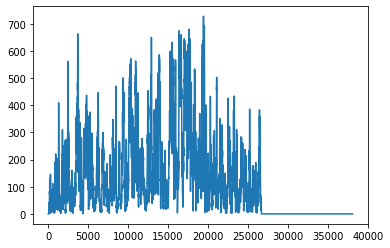

In [85]:
look_back=96

trainpredictplot=np.empty_like(dfnp)
trainpredictplot[:,:]=0
for i in range(len(train_predict)):
    trainpredictplot[i+look_back,0]=train_predict[i,0]
    
#trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#plt.plot(train_predict)
plt.plot(trainpredictplot)


In [86]:
print(len(train_predict))
print(len(dfnp))
print(len(test_predict))


26581
38112
11337


In [87]:
# shift test predictions for plotting
testpredictplot=np.empty_like(dfnp)
test_predict
testpredictplot[:,:]=0
for i in range(len(test_predict)):
    testpredictplot[i+len(train_predict)+(look_back*2)+1,0]=test_predict[i,0]
    
#testpredictplot[len(train_predict)+(look_back*2)+1:len(dfnp)-1]=test_predict
testpredictplot

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [76],
       [73],
       [ 0]], dtype=int64)

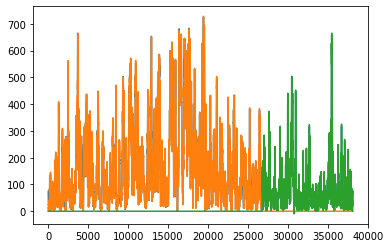

In [88]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dfnp_tr))
#plt.plot(dfnp_tr)
#plt.plot(testpredictplot)
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()



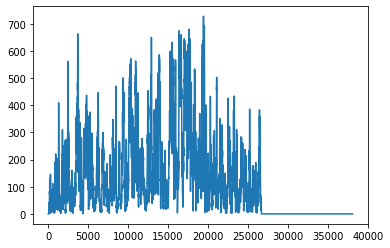

<function matplotlib.pyplot.show(close=None, block=None)>

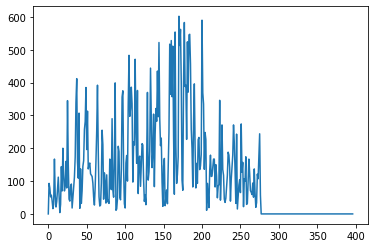

In [89]:
trainpredictplot

plt.plot(trainpredictplot)
plt.show()
trainpredicteddata=trainpredictplot.reshape(-1,96)
plt.plot(trainpredicteddata[:,95])
plt.show

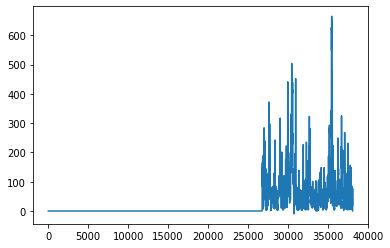

In [90]:
plt.plot(testpredictplot)
plt.show()

In [91]:
#PredictingO/P for next 3 days  that is 96X3 =  288 Output
from numpy import array
n_step=288
last_96=[]
len(dfnp_tr)

38112

In [92]:
dfnp_tr[38111-100:38111]

array([[0.0937931 ],
       [0.08965517],
       [0.08551724],
       [0.08137931],
       [0.07586207],
       [0.07034483],
       [0.0662069 ],
       [0.06068966],
       [0.05793103],
       [0.05517241],
       [0.0537931 ],
       [0.05241379],
       [0.04827586],
       [0.04827586],
       [0.04689655],
       [0.04551724],
       [0.04551724],
       [0.04275862],
       [0.04137931],
       [0.04275862],
       [0.04      ],
       [0.03862069],
       [0.04      ],
       [0.04137931],
       [0.04137931],
       [0.03862069],
       [0.04      ],
       [0.04275862],
       [0.04413793],
       [0.04413793],
       [0.04413793],
       [0.04137931],
       [0.03448276],
       [0.02896552],
       [0.02482759],
       [0.01793103],
       [0.0137931 ],
       [0.01103448],
       [0.01103448],
       [0.00965517],
       [0.00689655],
       [0.00689655],
       [0.00827586],
       [0.00827586],
       [0.00827586],
       [0.01241379],
       [0.01655172],
       [0.017

In [136]:
#last_96[0,i]=dfnp_tr[len(dfnp_tr)-96-1+i]
last_96=dfnp_tr[len(dfnp_tr)-96-1:len(dfnp_tr)-1]

In [137]:
last_96new=last_96.reshape(1,-1)


In [138]:
last_96new.shape

(1, 96)

In [139]:
y_futures=[]
last_96new=last_96new.reshape(last_96new.shape[0],last_96new.shape[1],1)
y_val=model.predict(last_96new)
y_val
#y_futures.append(y_val)
#y_futures
#y_futures.append(y_val)
#y_futures

array([[0.09778697]], dtype=float32)

In [140]:

for i in range(288):
    print(i)
    last_96new=last_96new.reshape(last_96new.shape[0],last_96new.shape[1],1)
    y_val=model.predict(last_96new)
    y_futures.append(y_val)
    temp_input=[]
    print(last_96new.shape)
    for j in range(95):
        val=last_96new[0,j+1,0]
        print(val)
        temp_input.append(val)
    temp_input.append(y_val)
    temp_input_new=np.array(temp_input)
    temp_input_new=temp_input_new.reshape(1,-1)
    print(temp_input_new.shape)
    temp_input_new=temp_input_new.reshape(temp_input_new.shape[0],temp_input_new.shape[1],1)
    last_96new=temp_input_new
    print(last_96new)
y_futures        

0
(1, 96, 1)
0.07034482758620689
0.06620689655172413
0.06068965517241379
0.05793103448275862
0.05517241379310345
0.053793103448275856
0.05241379310344827
0.04827586206896552
0.04827586206896552
0.046896551724137925
0.04551724137931034
0.04551724137931034
0.04275862068965517
0.041379310344827586
0.04275862068965517
0.039999999999999994
0.03862068965517241
0.039999999999999994
0.041379310344827586
0.041379310344827586
0.03862068965517241
0.039999999999999994
0.04275862068965517
0.044137931034482755
0.044137931034482755
0.044137931034482755
0.041379310344827586
0.034482758620689655
0.02896551724137931
0.02482758620689655
0.01793103448275862
0.013793103448275862
0.011034482758620689
0.011034482758620689
0.009655172413793102
0.006896551724137931
0.006896551724137931
0.008275862068965516
0.008275862068965516
0.008275862068965516
0.012413793103448275
0.01655172413793103
0.01793103448275862
0.023448275862068962
0.02896551724137931
0.03310344827586206
0.03586206896551724
0.044137931034482755
0.

G:\ANACONDA_INSTALLATION\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).